In [1]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [5]:
df['job_posted_month'] = df.job_posted_date.dt.strftime('%b')
df.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,Jun
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",Oct


In [15]:
# dict_month = {
#     'Jan' : df_jan,
#     'Feb' : df_feb,
#     'Mar' : df_mar,
#     'Apr' : df_apr,
#     'May' : df_may,
#     'Jun' : df_jun,
#     'Jul' : df_jul,
#     'Aug' : df_aug,
#     'Sep' : df_sep,
#     'Oct' : df_oct,
#     'Nov' : df_nov,
#     'Dec' : df_dec,

# }

months = df['job_posted_month'].unique().tolist()
dict_months = {month: df[df['job_posted_month']==month] for month in months}

dict_months['Jan'].sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
456553,Data Scientist,Data Science,"Chennai, Tamil Nadu, India",via Indeed,Full-time,False,India,2023-01-09 14:12:09,False,False,India,None,NaN,NaN,Quess IT Staffing,"['r', 'python', 'sql', 'scala', 'java', 'c++',...","{'analyst_tools': ['tableau'], 'libraries': ['...",Jan
720606,Data Scientist,Data Scientist,"Austin, TX",via LinkedIn,Full-time,False,Sudan,2023-01-18 21:49:30,False,False,Sudan,None,NaN,NaN,Lorien,"['python', 'sql', 'aws', 'pandas', 'numpy', 's...","{'cloud': ['aws'], 'libraries': ['pandas', 'nu...",Jan
293867,Data Engineer,Data Engineer,"Barcelona, Spain",via BeBee,Full-time,False,Spain,2023-01-22 17:19:49,True,False,Spain,None,NaN,NaN,"Kapres Technology, S.L.","['sql', 'nosql', 'python', 'java', 'r', 'scala...","{'databases': ['mongodb', 'elasticsearch'], 'l...",Jan
88528,Data Scientist,RWE Data Scientist - Sales Solutions,"San Francisco, CA",via Recruit.net,Contractor,False,"California, United States",2023-01-24 00:04:17,False,False,United States,None,NaN,NaN,"Tempus Labs, Inc.","['r', 'sql']","{'programming': ['r', 'sql']}",Jan
780509,Data Engineer,Principal Data Engineer,"Vienna, Austria",via Jobs Trabajo.org,Full-time,False,Austria,2023-01-27 05:33:17,False,False,Austria,None,NaN,NaN,Turing,"['python', 'sql', 'aws', 'airflow', 'tableau']","{'analyst_tools': ['tableau'], 'cloud': ['aws'...",Jan


# Needs 2023 Quarter 1

In [17]:
df_q1 = pd.concat([dict_months['Jan'],dict_months['Feb'],dict_months['Mar']],ignore_index=True)

<Axes: xlabel='job_posted_month'>

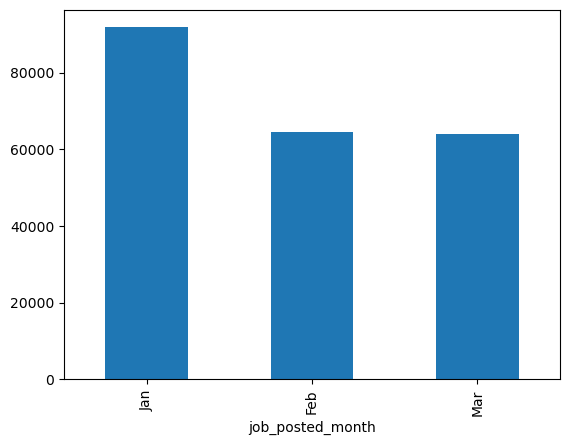

In [19]:
df_q1['job_posted_month'].value_counts().plot(kind='bar')